<a href="https://colab.research.google.com/github/manaswinit26/assignment4/blob/main/assignment_4_answers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment #4: Linear Models and Decision Trees
## Foundations of Machine Learning
## Do Q1 and one other question.
### Advice: Reuse your code and code from lectures, package routine tasks into functions, make plans about how you'll carry out the analysis before jumping into writing code, and work as efficiently as possible

**Q1.** This question is a case study for linear models and decision trees. The data are about car prices. In particular, they include:

  - `Price`, `Color`, `Seating_Capacity`
  - `Body_Type`: crossover, hatchback, muv, sedan, suv
  - `Make`, `Make_Year`: The brand of car and year produced
  - `Mileage_Run`: The number of miles on the odometer
  - `Fuel_Type`: Diesel or gasoline/petrol
  - `Transmission`, `Transmission_Type`:  speeds and automatic/manual

  1. Load `cars_hw.csv`. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.
  2. Summarize the `Price` variable and create a kernel density plot. Use `.groupby()` and `.describe()` to summarize prices by brand (`Make`). Make a grouped kernel density plot by `Make`. Which car brands are the most expensive? What do prices look like in general?
  3. Split the data into an 80% training set and a 20% testing set.
  4. Let's focus on linear models. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the test set? Make a second model where, for the categorical variables, make a model comprised of one-hot encoded regressors/features alone, and regress price on those variables; what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set? Does the joint model perform better or worse, and by home much?
  5. Use the `PolynomialFeatures` function from `sklearn` to expand the set of numerical variables you're using, along with the categorical variables. As you increase the degree of the expansion, how do the $R^2$ and `RMSE` change? At what point does $R^2$ go negative on the test set? For your best model with expanded features, what is the $R^2$ and `RMSE`? How does it compare to your best model from part 3?
  6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.
  7. Now, let's use a regression tree. Construct an appropriate matrix of regressors/features, and fit a tree to the data. Vary the maximum depth of the decision tree using the `max_depth` option (i.e. `tree.DecisionTreeRegressor(max_depth=D)`), and compute the $R^2$ and `RMSE` on the test set of a variety of depths. What depth tree gives the best results?
  8. For your best tree, determine the predicted values for the test data, and plot them against the true values. Do the predicted values and true values line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero?
  12. Which model --- linear model or classification and regression tree --- has better performance on the test set?

       Unnamed: 0    Make_Year   Mileage_Run  Seating_Capacity         Price
count  976.000000   976.000000    976.000000        976.000000  9.760000e+02
mean   488.500000  2016.963115  41571.195697          5.095287  7.410195e+05
std    281.891232     2.818742  24390.995134          0.446224  3.673234e+05
min      1.000000  2011.000000   1117.000000          4.000000  1.880000e+05
25%    244.750000  2015.000000  22676.750000          5.000000  4.757500e+05
50%    488.500000  2017.000000  37570.500000          5.000000  6.665000e+05
75%    732.250000  2019.000000  57421.250000          5.000000  8.830000e+05
max    976.000000  2022.000000  99495.000000          8.000000  2.941000e+06


<Axes: >

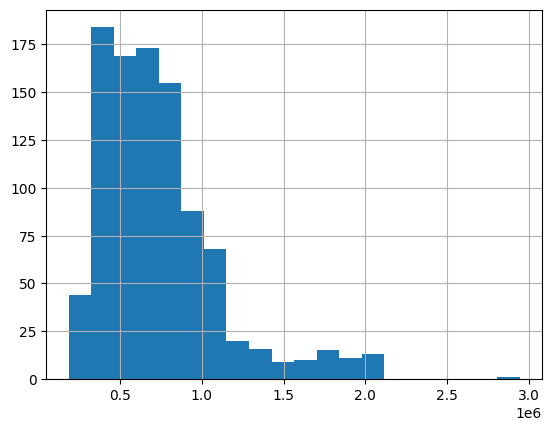

In [2]:
# 1.1
import pandas as pd
url="https://raw.githubusercontent.com/manaswinit26/assignment4/main/data/cars_hw.csv"
df1 = pd.read_csv(url,low_memory=False)
summary  = df1.describe()
print(summary)
df1['Price'].hist(bins=20)

In [85]:
df1.head()


,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000


In [86]:
# right skew in response variable, will have to do a log transformation
import numpy as np
df1['Price'] = np.log(df1['Price'])

<Axes: >

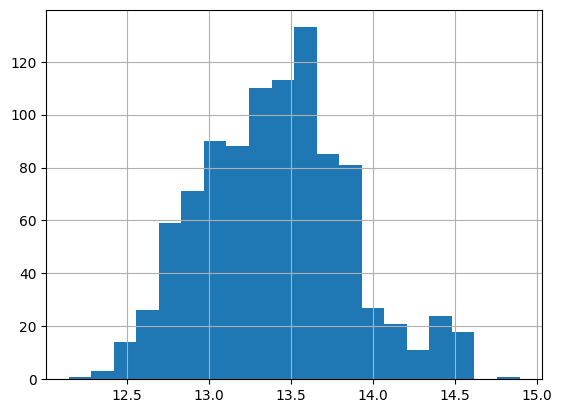

In [87]:
df1['Price'].hist(bins=20)
# now the histogram looks more normally distributed

<Axes: >

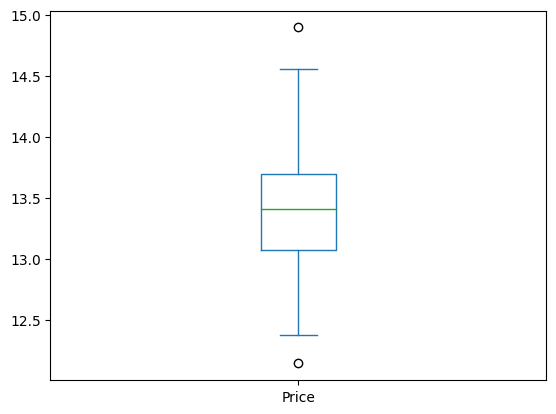

In [88]:
# I am also checking how many outliers there are with a box plot
df1['Price'].plot.box()
# looks like there are only 2 outliers in price (circles), so I will remove them from the dataset.

In [89]:
# removing outliers
Q1 = df1['Price'].quantile(0.25)
Q3 = df1['Price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
filter = (df1['Price'] >= lower_bound) & (df1['Price'] <= upper_bound)
cars = df1.loc[filter]

<Axes: >

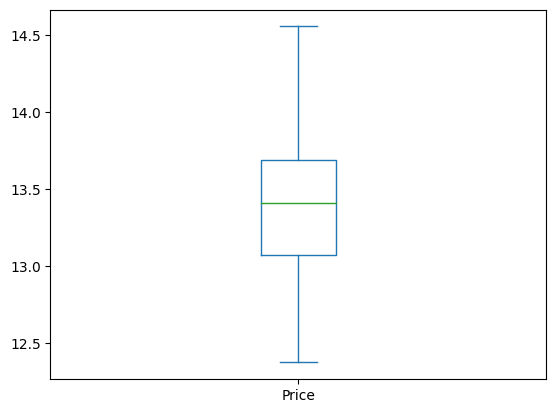

In [90]:
cars['Price'].plot.box() # new boxplot with outliers removed

In [91]:
# 1.2
cars['Price'].describe() # summary of price

count    974.000000
mean      13.410811
std        0.446380
min       12.375815
25%       13.073698
50%       13.409795
75%       13.690797
max       14.557448
Name: Price, dtype: float64

<Axes: ylabel='Density'>

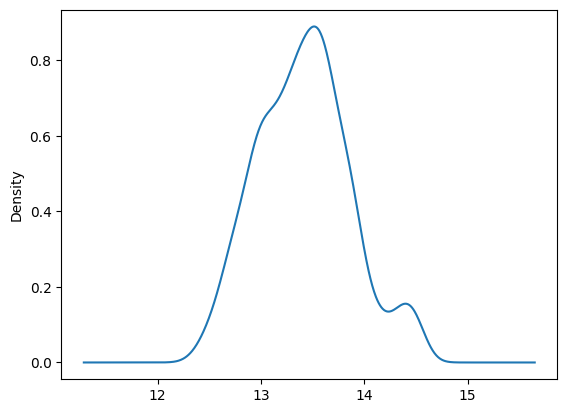

In [92]:
cars['Price'].plot.density() # kernel density plot for price

In [93]:
cars.groupby('Make')['Price'].describe() # summarizing prices by make

,count,mean,std,min,25%,50%,75%,max
Make,,,,,,,,
Chevrolet,6.0,12.919895,0.480975,12.495004,12.568392,12.752286,13.171681,13.701221
Datsun,3.0,12.576047,0.036311,12.538967,12.558302,12.577636,12.594587,12.611538
Ford,52.0,13.468280,0.210895,12.577636,13.361380,13.469493,13.575984,13.879424
Honda,73.0,13.536318,0.336972,12.663497,13.272506,13.573439,13.726679,14.245343
Hyundai,305.0,13.368511,0.398781,12.421184,13.091904,13.366094,13.637579,14.370544
Jeep,4.0,14.216591,0.105084,14.070153,14.183270,14.240265,14.273586,14.315680
Kia,8.0,14.292177,0.076877,14.129591,14.272242,14.303105,14.349515,14.369970
MG Motors,35.0,14.439052,0.066263,14.278615,14.395744,14.429615,14.497597,14.518113
Mahindra,18.0,13.898953,0.159906,13.587354,13.851808,13.905680,13.961249,14.197366


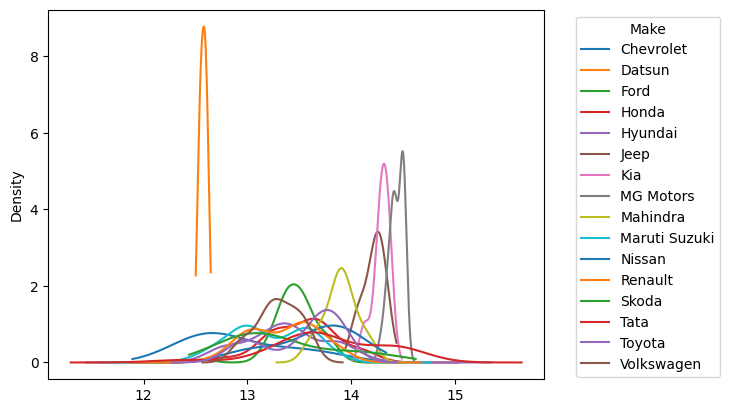

In [94]:
# kernel density plot of price grouped by make
import matplotlib.pyplot as plt
grouped_cars = cars.groupby('Make')['Price']
grouped_cars.plot.density(legend = True)
plt.legend(title='Make', bbox_to_anchor=(1.05, 1), loc='upper left')

MG Motors, Kia, and Jeep are the top most expensive car brands based on their average prices. In general, most cars have prices around the 13-14 price range. A couple of the brands, like Tata, have a very wide range of prices.

In [95]:
# 1.3 splitting into training and test data

from sklearn.model_selection import train_test_split
X = cars.drop('Price', axis=1)
y = cars['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)
TSS = np.sum( (y_test - y_train.mean()) ** 2 )
N_test = len(y_test)

In [96]:
# 1.4 - regressing on numeric variables
from sklearn.linear_model import LinearRegression # Import linear regression model

numeric_vars = ['Make_Year','Mileage_Run','Seating_Capacity']
X_train_num = X_train[numeric_vars]
X_test_num = X_test[numeric_vars]
reg_model = LinearRegression().fit(X_train_num, y_train)

y_preds = reg_model.predict(X_test_num) # predicted y's
residuals_reg = y_test - y_preds

## Metrics:
reg_SSE = np.sum( (y_test - y_preds) ** 2 )
reg_MSE = (1/N_test)*np.sum( (y_test-y_preds)**2 )
reg_RMSE = (reg_SSE/N_test) ** (1/2) # RMSE
reg_R2 = 1 - reg_SSE/TSS
print("R2:", reg_R2)
print("RMSE:", reg_RMSE)

R2: 0.44285157234212447
RMSE: 0.33489544582158226


In [97]:
# 1.4 - regressing on categorical variables
from sklearn.preprocessing import OneHotEncoder
categorical_vars = ['Make','Color','Body_Type', 'No_of_Owners',
                    'Fuel_Type', 'Transmission','Transmission_Type']

# one hot encoding
X_train_cat = X_train[categorical_vars]
X_test_cat = X_test[categorical_vars]
oh = OneHotEncoder(sparse=False, handle_unknown='ignore')

X_train_oh = oh.fit_transform(X_train_cat) # transforming
X_test_oh = oh.transform(X_test_cat)

reg_oh = LinearRegression().fit(X_train_oh, y_train) # fitting model

y_preds_oh = reg_oh.predict(X_test_oh) # predicted y's
residuals_oh = y_test - y_preds_oh

## Metrics:
oh_SSE = np.sum( (y_test - y_preds_oh) ** 2 )
oh_MSE = (1/N_test)*np.sum( (y_test-y_preds_oh)**2 )
oh_RMSE = (oh_SSE/N_test) ** (1/2) # RMSE
oh_R2 = 1 - oh_SSE/TSS
print("R2:", oh_R2)
print("RMSE:", oh_RMSE)


R2: 0.6564071945589787
RMSE: 0.2629939862544107


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


The model with just categorical variables has a lower RMSE and a higher R^2 than the model with only numerical variables, so I would say the second model performs better on the test set.

In [98]:
# 1.4 - model w/ numerical and categorical

X_train_combined = np.concatenate((X_train_num, X_train_oh), axis=1) # combined numerical and categorical
X_test_combined = np.concatenate((X_test_num, X_test_oh), axis=1)

reg_combined = LinearRegression().fit(X_train_combined, y_train)

y_preds_combined = reg_combined.predict(X_test_combined) # predicted y's
residuals_combined = y_test - y_preds_combined

## Metrics:
combined_SSE = np.sum( (y_test - y_preds_combined) ** 2 )
combined_MSE = (1/N_test)*np.sum( (y_test-y_preds_combined)**2 )
combined_RMSE = (combined_SSE/N_test) ** (1/2) # RMSE
combined_R2 = 1 - combined_SSE/TSS
print("R2:", combined_R2)
print("RMSE:", combined_RMSE)


R2: 0.8427852686561395
RMSE: 0.17789772982359647


The joint model performs better. It has a lower test RMSE and higher R^2 than both of the previous models. Compared to the categorical model, it has a lower RMSE by about 0.1.

In [99]:
# 1.5 - expanding variables on different degrees
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

y=cars['Price'] # response

numerics = cars[['Make_Year','Mileage_Run','Seating_Capacity']]
categoricals = pd.get_dummies(cars[['Make', 'Color', 'Body_Type', 'No_of_Owners', 'Fuel_Type', 'Transmission', 'Transmission_Type']], dtype='int')

df=pd.concat([numerics, categoricals],axis=1) # combining numeric and categorical vars
X = df

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50) # split data

expander = PolynomialFeatures(degree=2,include_bias=False) # creating expander for 2 degrees

Z_train = expander.fit_transform(X_train) # expanded set
Z_test = expander.transform(X_test)

expanded_model = LinearRegression().fit(Z_train, y_train)

y_preds_expanded = expanded_model.predict(Z_test)

R2_2 = r2_score(y_test, y_preds_expanded)
RMSE_2 = mean_squared_error(y_test, y_preds_expanded)

print("R^2 for 2 degrees:", R2_2)
print("RMSE for 2 degrees:", RMSE_2)

# R^2 is already negative at 2 degrees.... and numbers look weird

# 3 degrees
expander_3 = PolynomialFeatures(degree=3,include_bias=False) # creating expander for 3 degrees

Z_train_3 = expander_3.fit_transform(X_train) # expanded set
Z_test_3 = expander_3.transform(X_test)

expanded_model_3 = LinearRegression().fit(Z_train_3, y_train)

y_preds_expanded_3 = expanded_model_3.predict(Z_test_3)

R2_3 = r2_score(y_test, y_preds_expanded_3)
RMSE_3 = mean_squared_error(y_test, y_preds_expanded_3)

print("R^2 for 3 degrees:", R2_3)
print("RMSE for 3 degrees:", RMSE_3)

# 4 degrees
# expander_4 = PolynomialFeatures(degree=4,include_bias=False) # creating expander for 4 degrees

# Z_train_4 = expander_4.fit_transform(X_train) # expanded set
# Z_test_4 = expander_4.transform(X_test)

# expanded_model_4 = LinearRegression().fit(Z_train_4, y_train)

# y_preds_expanded_4 = expanded_model_4.predict(Z_test_4)

# R2_4 = r2_score(y_test, y_preds_expanded_4)
# RMSE_4 = mean_squared_error(y_test, y_preds_expanded_4)

# print("R^2 for 4 degrees:", R2_4)
# print("RMSE for 4 degrees:", RMSE_4)


R^2 for 2 degrees: -14615636169.588459
RMSE for 2 degrees: 2929710629.0065823
R^2 for 3 degrees: -54700.57199176473
RMSE for 3 degrees: 10964.953903966089


When I start at 2 degrees, the R^2 is already negative. As I increase degrees, both R^2 and RMSE increase. The R^2 is higher for 3 degrees than 2 degrees. Since the R^2 is negative, this indicates 3 degrees performs better because it is getting less negative. The RMSE for 3 degrees is much lower than the RMSE for 2 degrees, so the 3 degree model is my best model for this part. Also, I tried to further expand to 4 degrees but I got an error, so I guess it only works until 3 degrees. Compared to my best model from the last part, that combined numerical and categorical variables, the RMSE is much higher and R^2 is much lower and negative. This means that expanding the variables may lead to overfitting.

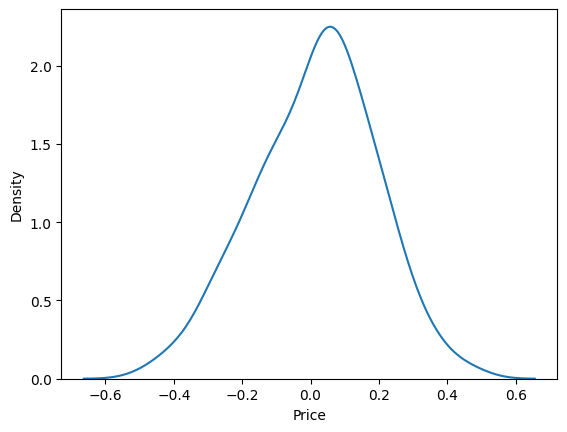

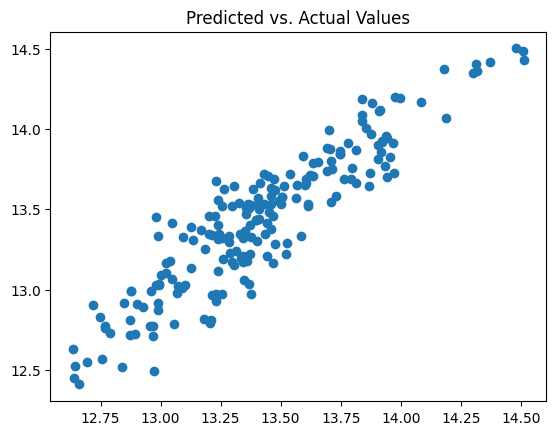

In [100]:
# 6 - best model (combined variables): predicted vs true values plot
import seaborn as sns

X_train_combined = np.concatenate((X_train_num, X_train_oh), axis=1) # combined numerical and categorical
X_test_combined = np.concatenate((X_test_num, X_test_oh), axis=1)

reg_combined = LinearRegression().fit(X_train_combined, y_train)
y_preds_combined = reg_combined.predict(X_test_combined)

residuals_combined = y_test - y_preds_combined # combined residuals

sns.kdeplot(residuals_combined) # residuals plot
plt.show()

plt.scatter(x=y_preds_combined,y=y_test) # true versus predicted plot
plt.title('Predicted vs. Actual Values')
plt.show()


Residuals plot: the residuals look roughly bell-shaped around zero


Predicted vs true plot: the predicted values and true values roughly line up along the diagonal

NameError: ignored

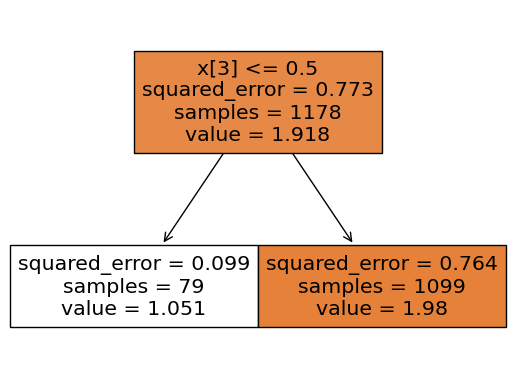

In [10]:
# 7 - max depth = 1
from sklearn import tree

model = tree.DecisionTreeRegressor(max_depth=1) # Fit the classifier
cart = model.fit(X_train, y_train)
tree.plot_tree(cart,filled=True)
plt.show()

## Make Predictions on the Test Set
y_hat_cart = cart.predict(X_test)
residuals_cart = y_test - y_hat_cart

## Metrics:
SSE_cart = np.sum( (y_test-y_hat_cart)**2 )
MSE_cart = (1/N_test)*np.sum( (y_test-y_hat_cart)**2 )
RMSE_cart = (SSE_cart/N_test)**(1/2)
R2_cart = 1 - SSE_cart/TSS
print("R2:", R2_cart)
print("RMSE:", RMSE_cart)

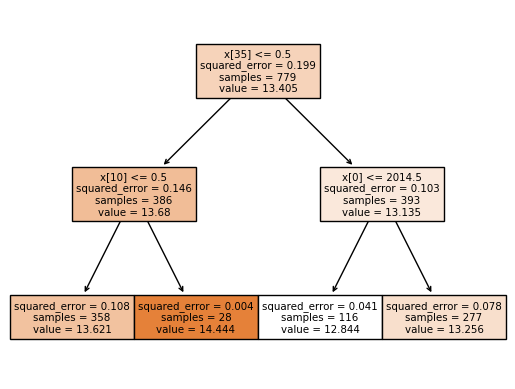

R2: 0.5650238595858947
RMSE: 0.2959078624557388


In [76]:
# 7 - max depth = 2
from sklearn import tree

model = tree.DecisionTreeRegressor(max_depth=2) # Fit the classifier
cart = model.fit(X_train, y_train)
tree.plot_tree(cart,filled=True)
plt.show()

## Make Predictions on the Test Set
y_hat_cart = cart.predict(X_test)
residuals_cart = y_test - y_hat_cart

## Metrics:
SSE_cart = np.sum( (y_test-y_hat_cart)**2 )
MSE_cart = (1/N_test)*np.sum( (y_test-y_hat_cart)**2 )
RMSE_cart = (SSE_cart/N_test)**(1/2)
R2_cart = 1 - SSE_cart/TSS
print("R2:", R2_cart)
print("RMSE:", RMSE_cart)

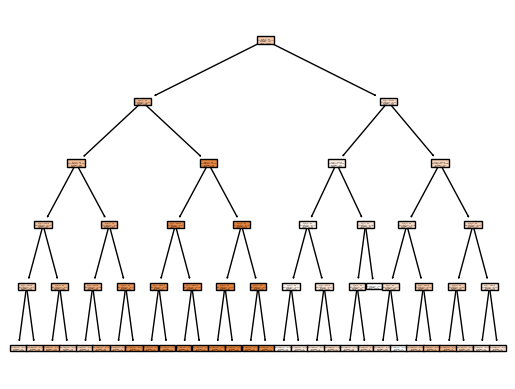

R2: 0.7699807267204025
RMSE: 0.2151819806063042


In [75]:
# 7 - max depth = 5
from sklearn import tree

model = tree.DecisionTreeRegressor(max_depth=5) # Fit the classifier
cart = model.fit(X_train, y_train)
tree.plot_tree(cart,filled=True)
plt.show()

## Make Predictions on the Test Set
y_hat_cart = cart.predict(X_test)
residuals_cart = y_test - y_hat_cart

## Metrics:
SSE_cart = np.sum( (y_test-y_hat_cart)**2 )
MSE_cart = (1/N_test)*np.sum( (y_test-y_hat_cart)**2 )
RMSE_cart = (SSE_cart/N_test)**(1/2)
R2_cart = 1 - SSE_cart/TSS
print("R2:", R2_cart)
print("RMSE:", RMSE_cart)

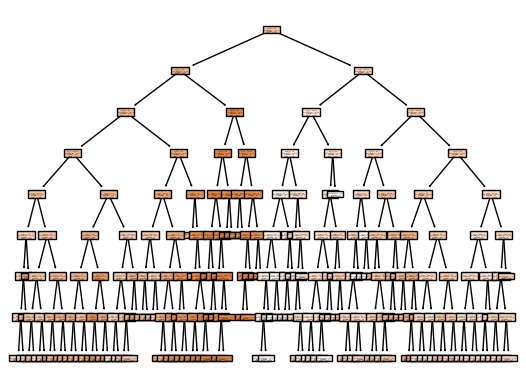

R2: 0.7892693279525524
RMSE: 0.20596226688930494


In [74]:
# 7 - max depth = 8
from sklearn import tree

model = tree.DecisionTreeRegressor(max_depth=8) # Fit the classifier
cart = model.fit(X_train, y_train)
tree.plot_tree(cart,filled=True)
plt.show()

## Make Predictions on the Test Set
y_hat_cart = cart.predict(X_test)
residuals_cart = y_test - y_hat_cart


## Metrics:
SSE_cart = np.sum( (y_test-y_hat_cart)**2 )
MSE_cart = (1/N_test)*np.sum( (y_test-y_hat_cart)**2 )
RMSE_cart = (SSE_cart/N_test)**(1/2)
R2_cart = 1 - SSE_cart/TSS
print("R2:", R2_cart)
print("RMSE:", RMSE_cart)

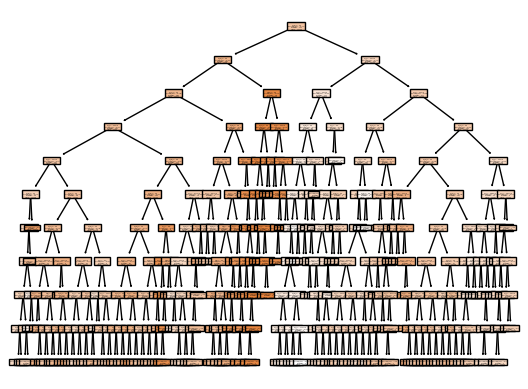

R2: 0.7699437625703474
RMSE: 0.21519926980859452


In [73]:
# 7 - max depth = 10
from sklearn import tree

model = tree.DecisionTreeRegressor(max_depth=10) # Fit the classifier
cart = model.fit(X_train, y_train)
tree.plot_tree(cart,filled=True)
plt.show()

## Make Predictions on the Test Set
y_hat_cart = cart.predict(X_test)
residuals_cart = y_test - y_hat_cart


## Metrics:
SSE_cart = np.sum( (y_test-y_hat_cart)**2 )
MSE_cart = (1/N_test)*np.sum( (y_test-y_hat_cart)**2 )
RMSE_cart = (SSE_cart/N_test)**(1/2)
R2_cart = 1 - SSE_cart/TSS
print("R2:", R2_cart)
print("RMSE:", RMSE_cart)

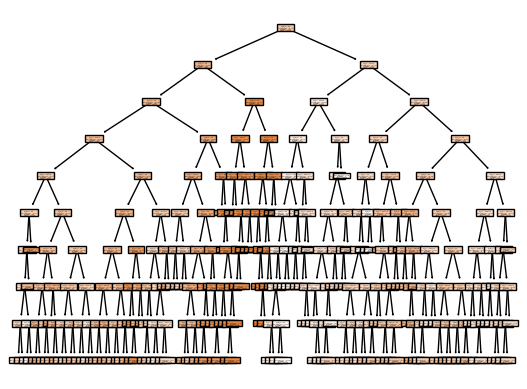

R2: 0.7649449252602717
RMSE: 0.21752471234247833


In [72]:
# 7 - max depth = 9
from sklearn import tree

model = tree.DecisionTreeRegressor(max_depth=9) # Fit the classifier
cart = model.fit(X_train, y_train)
tree.plot_tree(cart,filled=True)
plt.show()

## Make Predictions on the Test Set
y_hat_cart = cart.predict(X_test)
residuals_cart = y_test - y_hat_cart

## Metrics:
SSE_cart = np.sum( (y_test-y_hat_cart)**2 )
MSE_cart = (1/N_test)*np.sum( (y_test-y_hat_cart)**2 )
RMSE_cart = (SSE_cart/N_test)**(1/2)
R2_cart = 1 - SSE_cart/TSS
print("R2:", R2_cart)
print("RMSE:", RMSE_cart)

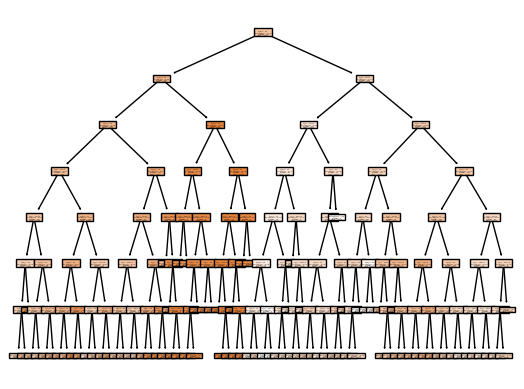

R2: 0.7931649974544464
RMSE: 0.2040496269321099


In [71]:
# 7 - max depth = 7
from sklearn import tree

model = tree.DecisionTreeRegressor(max_depth=7) # Fit the classifier
cart = model.fit(X_train, y_train)
tree.plot_tree(cart,filled=True)
plt.show()

## Make Predictions on the Test Set
y_hat_cart = cart.predict(X_test)
residuals_cart = y_test - y_hat_cart


## Metrics:
SSE_cart = np.sum( (y_test-y_hat_cart)**2 )
MSE_cart = (1/N_test)*np.sum( (y_test-y_hat_cart)**2 )
RMSE_cart = (SSE_cart/N_test)**(1/2)
R2_cart = 1 - SSE_cart/TSS
print("R2:", R2_cart)
print("RMSE:", RMSE_cart)

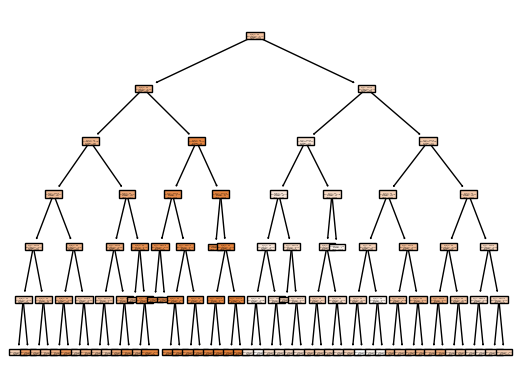

R2: 0.7764709047680542
RMSE: 0.21212449294549818


In [67]:
# 7 - max depth = 6
from sklearn import tree

model = tree.DecisionTreeRegressor(max_depth=6) # Fit the classifier
cart = model.fit(X_train, y_train)
tree.plot_tree(cart,filled=True)
plt.show()

## Make Predictions on the Test Set
y_hat_cart = cart.predict(X_test)
residuals_cart = y_test - y_hat_cart


## Metrics:
SSE_cart = np.sum( (y_test-y_hat_cart)**2 )
MSE_cart = (1/N_test)*np.sum( (y_test-y_hat_cart)**2 )
RMSE_cart = (SSE_cart/N_test)**(1/2)
R2_cart = 1 - SSE_cart/TSS
print("R2:", R2_cart)
print("RMSE:", RMSE_cart)

I think that a depth of 7 gives the best results. First I tried a depth of 1 as my baseline. Then I tried a depth of 2, which increased R squared and decreased RMSE. From this I knew I could try higher depths as it may lead to better results. I tried a depth of 5, and saw that R squared increased and RMSE decreased. Then I tried to a depth of 8 and R squared increased and RMSE decreased. The pattern that I saw until then was that higher depths = better results. But then I tried a depth of 10 which actually gave me a decreased R squared and a higher RMSE. This means that the best depth would have to be lower than 10. When I tried a max depth of 9 I was still seeing worsened results compared to max depth = 8. Then I tried max depth of 7, which gave me the lowest RMSE and highest R squared of all depths.

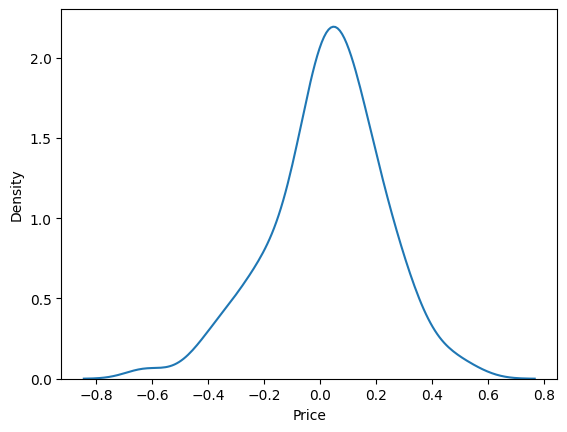

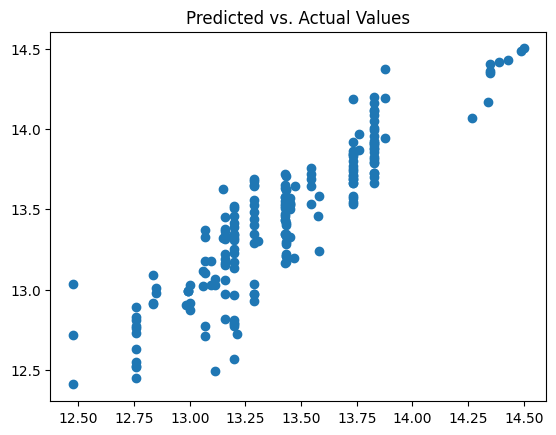

In [70]:
# 8 - predicted vs true and residual plots
from sklearn import tree

model = tree.DecisionTreeRegressor(max_depth=7) # Fit the classifier
cart = model.fit(X_train, y_train)

## Make Predictions on the Test Set
y_hat_cart = cart.predict(X_test)
residuals_cart = y_test - y_hat_cart

## Residual plot:
sns.kdeplot(residuals_cart)
plt.show()

## True versus predicted plot:
plt.scatter(x=y_hat_cart,y=y_test)
plt.title('Predicted vs. Actual Values')
plt.show()

Predicted vs actual values plot: the predicted values and true values line up along the diagonal


Residual plot: the residuals look roughly bell-shaped around zero

# 9:
My top 2 performing models were the linear regression model with categorical and numerical variables combined, and the regression tree with a max depth of 7. From these two, the combined linear regression model had a slightly higher R^2 and lower RMSE, indicating better performance on the test set.

**Q3.** This a question purely on categorical prediction. The data for this happen to be gathered in 1987 in Indonesia, and concern contraceptive method choice. The questions and data-gathering assumptions reflect the culture and attitudes of that time and place, but provide a good example of a categorical prediction problem on an important topic (family planning and maternal health The variables in the data are:

    - Wife's age (numerical)
    - Wife's education (categorical) 1=low, 2, 3, 4=high
    - Husband's education (categorical) 1=low, 2, 3, 4=high
    - Number of children ever born (numerical)
    - Wife's religion (binary) 0=Non-Islam, 1=Islam
    - Wife's now working? (binary) 0=Yes, 1=No
    - Husband's occupation (categorical) 1, 2, 3, 4
    - Standard-of-living index (categorical) 1=low, 2, 3, 4=high
    - Media exposure (binary) 0=Good, 1=Not good
    - Contraceptive method used (class attribute) 1=No-use, 2=Long-term, 3=Short-termhort-term

  1. Load the `contraceptiveMethodChoice.csv` data. Tabulate the `method` variable (i.e. `.value_counts()`). 1 corresponds to `No Contraception`, 3 corresponds to `Short Term` (e.g. condoms, birth control pills), and 2 corresponds to `Long Term` (e.g. IUD, sterilization). Cross tabulate `method` and `numberChildren`. Do couples that use birth control tend to have more children than those who don't?
  2. Split the sample into ~80% training data and ~20% testing data.
  3. We are now going to make a mistake. Train a regression tree to predict the contraceptive method using the other variables in the data, not a classification tree. Look at the terminal nodes in the tree: What values do they take? Does that make sense? Explain clearly what has gone wrong here.
  4. Instead of regression, use a classification tree to predict contraceptive method using the other variables in the data. How does it look different from the previous tree? What variables does the algorithm use? In broad terms, which groups of people are most likely to use each method of contraception?
  5. Compute a confusion matrix for your classification tree on the test set (Hint: There are now three categories instead of two, so the cross tabulation will be a $3 \times 3$ matrix instead of $2 \times 2$.). Compute the Accuracy of your model overall, and the Accuracy for predicting each contraceptive method.
  7. Why can't you use a linear probability model to do this exercise? Explain clearly in words.

In [4]:
# 3.1 - loading data
url2="https://raw.githubusercontent.com/DS3001/assignment4/main/data/contraception_hw.csv"
df2 = pd.read_csv(url2,low_memory=False)
df = df2.drop(df2.columns[0], axis=1)
df.head()


,age,edu,edu_spouse,numberChildren,religion,working,spouse_occupation,standardOfLivingIndex,mediaExposure,method
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1


In [5]:
# 3.1 - tabulating method variable
method_tabulate = df['method'].value_counts()
print(method_tabulate)

1    629
3    511
2    333
Name: method, dtype: int64


In [6]:
# 3.1 - cross tabulate method and numberChildren
cross_tab = pd.crosstab(df['method'], df['numberChildren'])
print(cross_tab)

numberChildren  0    1    2    3   4   5   6   7   8   9   10  11  12  13  16
method                                                                       
1               95  143  114   70  57  44  35  18  29   5   9   6   4   0   0
2                0   46   56   70  62  36  27  19   9   3   2   2   0   1   0
3                2   87  106  119  78  55  30  12   9   8   0   3   0   1   1


In [7]:
# 3.1 - do couples who use birth control tend to have more kids than couples who don't?
numChildren_mean = df.groupby('method')['numberChildren'].mean()
print(numChildren_mean)

method
1    2.934817
2    3.738739
3    3.352250
Name: numberChildren, dtype: float64


Assuming birth control includes long term and short term, couples that use birth control tend to have on average more kids than couples that use no contraception.

In [8]:
# 3.2 - splitting data into train and test

X = df.drop('method', axis=1)
y = df['method']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

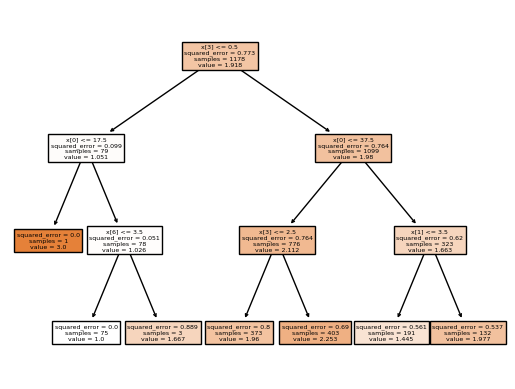

In [13]:
# 3.3 - make a mistake
import matplotlib.pyplot as plt
model = tree.DecisionTreeRegressor(max_depth = 3)
cart = model.fit(X_train, y_train)
tree.plot_tree(cart,filled=True)
plt.show()

The values are outputted as continuous values, such as 1.918, 2.2272, and
2.61. This doesn't make sense with the context of the method variable. The method variable can only be predicted in a discrete form as it only takes on 1, 2, or 3 and can't be a decimal between those numbers.

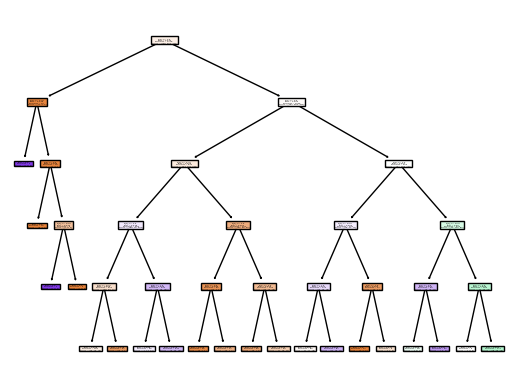

In [15]:
# 3.4 - classification tree
from sklearn import tree

model = tree.DecisionTreeClassifier(max_depth = 5) # Fit the classifier
cart = model.fit(X_train, y_train)
tree.plot_tree(cart,filled=True)
plt.show()

I did a max depth of 2 because with higher depths I couldn't see anything, so this might not be completely accurate. From what I see, the variables used are numChildren, age, and edu. Out of couples with less than 1 child, younger women are most likely to use no contraception. There is a low percent of young women who use short term contraception, and no women that use long term. Out of couples with more than 1 child, women with less than 3.5 years of education are most likely to use no contraception, followed by long-term, then short-term. Women with more than 3.5 years are more likley to use short-term or long-term contraception vs no contraception.

In [16]:
print(df.columns[3])
print(df.columns[1])
print(df.columns[0])


numberChildren
edu
age


In [20]:
# 3.5
import numpy as np
from sklearn.metrics import confusion_matrix
model = tree.DecisionTreeClassifier(max_depth = 5) # Fit the classifier
cart = model.fit(X_train, y_train)
y_hat_cart = cart.predict(X_test)

tab = pd.crosstab(np.array(y_hat_cart), np.array(y_test), rownames=['Predicted'], colnames=['Actual'])

print(tab)

Actual      1   2   3
Predicted            
1          88  29  33
2          10  28  15
3          23  17  52


total accuracy: (88 + 28 + 52)/ (88 + 10 + 23 + 29 + 28 + 17 + 33 + 15 + 52)
 = 168/295
 = 57%

accuracy for 1: 88 / (88 + 10 + 23) = 88 / 121 = 72.7%

accuracy for 2: 28 / (29 + 28 + 17) = 28 / 74 = 37.8%

accuracy for 3: 52 / (33 + 15 + 52) = 52 / 100 = 52%

this model doesn't have the best accuracies..

# 6
The main reason is that linear probabilities deal with continuous values while classification problems deal with discrete values.